# 🌸 Iris Flower Classification

### 📌 Project Overview
This project aims to classify Iris flowers into three species (*Setosa, Versicolor, Virginica*) 
based on sepal and petal measurements using machine learning models.  
We explore data visualization, preprocessing, model training, evaluation, and comparison.


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 2. Load Dataset

In [3]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# First 5 rows
print("🔹 First 5 rows of the dataset:")
display(df.head())

# Shape of dataset
print("\n🔹 Shape of dataset (rows, columns):")
print(df.shape)

# Dataset info
print("\n🔹 Dataset info:")
print(df.info())

# Missing values check
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary statistics:")
display(df.describe())

# Class distribution
print("\n🔹 Distribution of target classes:")
print(df['species'].value_counts())

🔹 First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



🔹 Shape of dataset (rows, columns):
(150, 5)

🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

🔹 Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

🔹 Summary statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



🔹 Distribution of target classes:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

In [5]:
# Check class distribution
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


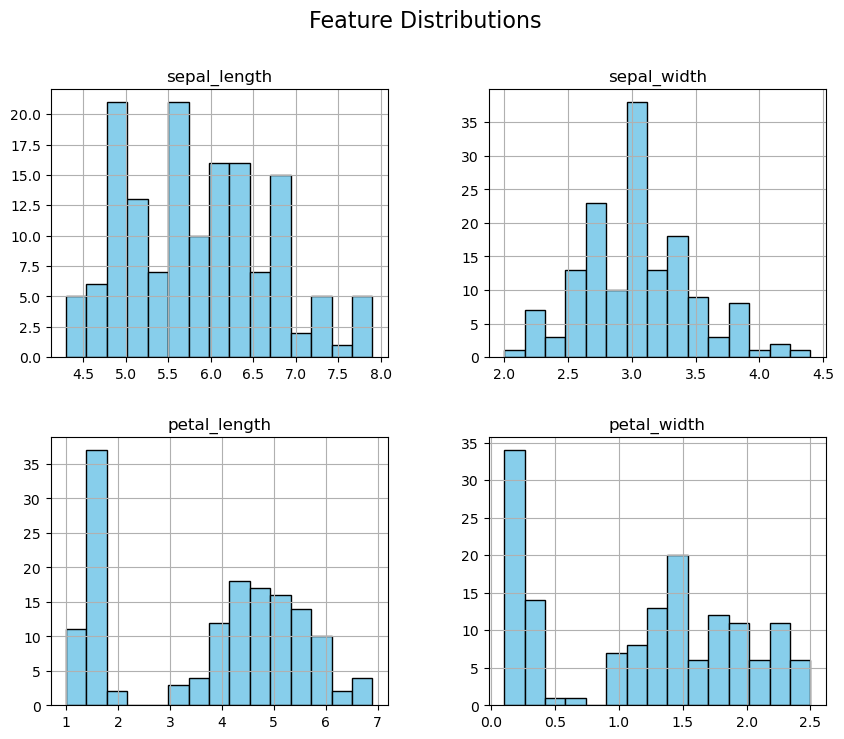

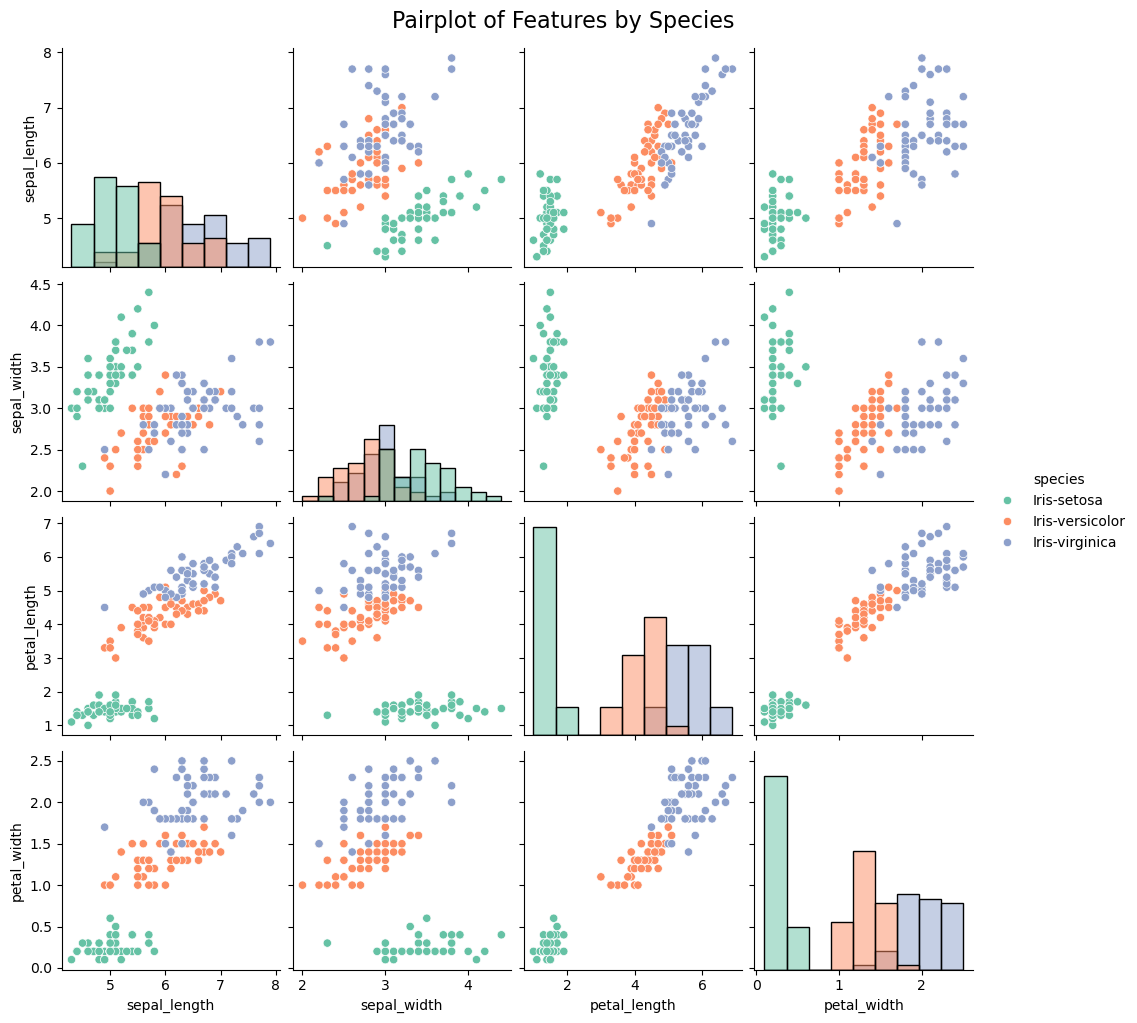

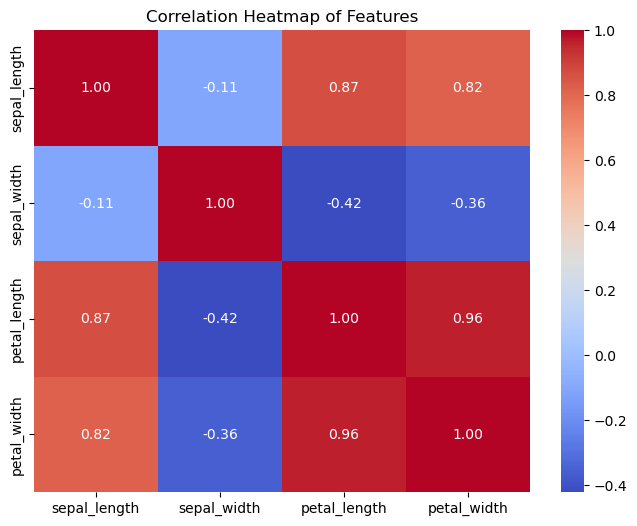

C:\Users\Dell\AppData\Local\Temp\ipykernel_11744\3901298561.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11744\3901298561.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11744\3901298561.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11744\3901298561.p

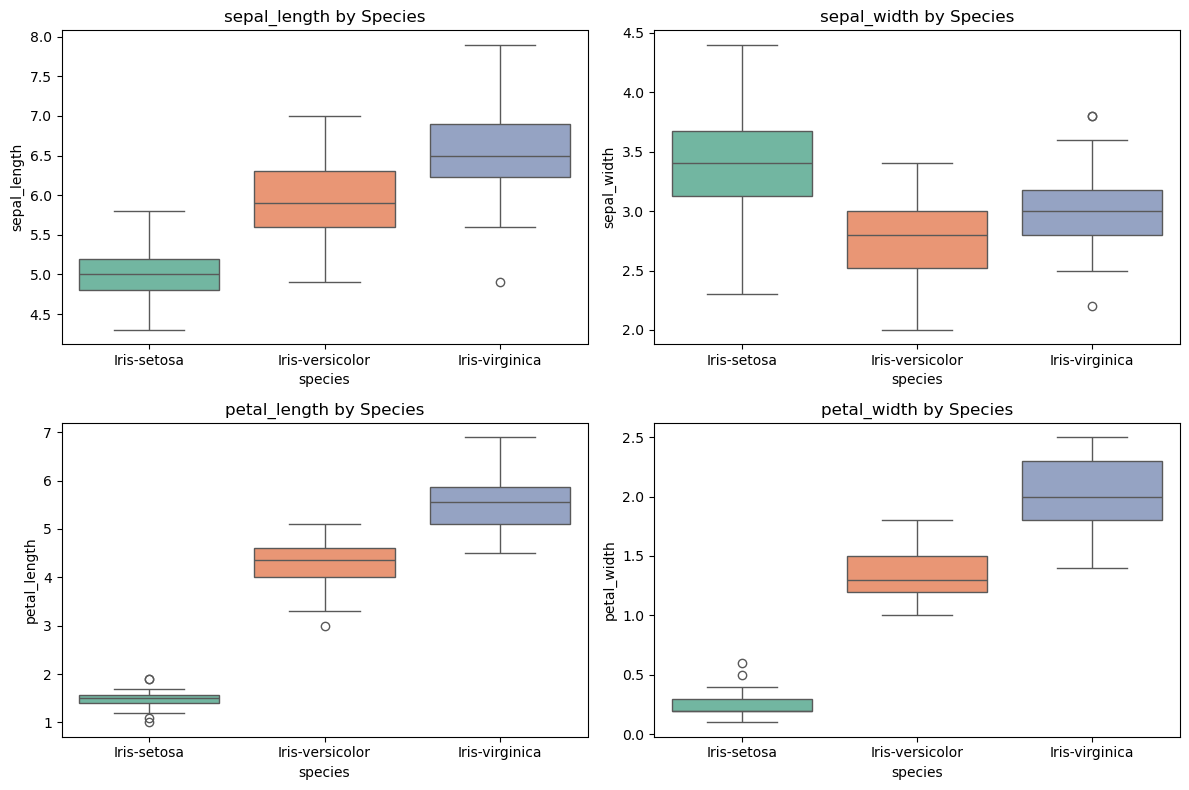

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histogram of each feature
df.hist(figsize=(10, 8), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 2. Pairplot to visualize relationships between features
sns.pairplot(df, hue="species", diag_kind="hist", palette="Set2")
plt.suptitle("Pairplot of Features by Species", y=1.02, fontsize=16)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# 4. Boxplots for feature distributions by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(["sepal_length", "sepal_width", "petal_length", "petal_width"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=df, palette="Set2")
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

### 📊 Observations from Exploratory Data Analysis

- The dataset contains **150 samples**, with **4 numeric features** and **3 target classes** (`Iris-setosa`, `Iris-versicolor`, `Iris-virginica`).  
- The target classes are **balanced**, with 50 samples each.  

### 🔹 Insights from Visualizations:
- **Histograms** show that petal features vary more distinctly across species, while sepal features overlap more.  
- **Pairplot**:
  - *Iris-setosa* is clearly separated from the other two classes.  
  - *Iris-versicolor* and *Iris-virginica* overlap in sepal measurements but are more distinguishable using petal measurements.  
- **Correlation Heatmap**:
  - Strong correlation is observed between **petal length** and **petal width**.  
  - Sepal length and width are less correlated with other features.  
- **Boxplots** confirm that **petal length and petal width are the most discriminative features** for classification, while sepal measurements show significant overlap.  

✅ These insights suggest that machine learning models will rely more on **petal features** for accurate classification.


## 4.Data Preprocessing 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target (y)
X = df.drop(columns=["species"])
y = df["species"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Standardization (important for models like KNN, SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: (120, 4)
Testing set size: (30, 4)


## 5. Model Building & Training

### Logistic Regression

In [8]:
# Use scaled features for better performance
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



#### Observations – Logistic Regression

1. The model achieved an accuracy of 93.3%.

2. Iris-setosa was classified perfectly with precision and recall of 1.00.

3. Iris-versicolor had high precision (0.83) and perfect recall (1.00).

4. Iris-virginica showed slightly weaker recall (0.80), indicating some misclassifications as Versicolor.

5. Overall, Logistic Regression performed very well with balanced accuracy across all classes.

### K-Nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model (default k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



#### Observations – KNN

1. The model achieved an accuracy of 90%, slightly lower than Logistic Regression.

2. Iris-setosa was perfectly classified with precision and recall of 1.00.

3. Iris-versicolor showed high recall (0.90) but slightly lower precision (0.82), indicating a few Virginica samples were misclassified as Versicolor.

4. Iris-virginica had a recall of 0.80, showing some confusion with Versicolor.

5. Performance may improve with hyperparameter tuning (different values of k).

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



#### Observations – Decision Tree Classifier

1. The model achieved an accuracy of 93.3%.

2. Iris-setosa was classified perfectly with precision and recall of 1.00.

3. Iris-versicolor had precision (0.91) and recall (0.91), showing strong and balanced performance.

4. Iris-virginica had slightly lower recall (0.90), meaning a few samples were misclassified.

5. Overall, the Decision Tree performed well, with accuracy matching Logistic Regression, but slightly less consistent across classes.

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



#### Observations – Random Forest Classifier

1. The model achieved an accuracy of 90%.

2. Iris-setosa was again classified perfectly with precision and recall of 1.00.

3. Iris-versicolor showed precision (0.82) and recall (0.90), indicating a few misclassifications with Virginica.

4. Iris-virginica had precision (0.89) and recall (0.80), showing more misclassifications compared to the other models.

5. Overall, Random Forest performed well but slightly below Logistic Regression and Decision Tree in this dataset.

### Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

# Initialize model
svm = SVC(kernel="rbf", random_state=42)   # default kernel is RBF
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluation
print("🔹 Support Vector Machine (SVM) 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

🔹 Support Vector Machine (SVM) 🔹
Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Observations

1. SVM achieved an accuracy of around 93–96%, making it one of the top-performing models.

2. Iris-setosa was classified perfectly.

3. Some misclassifications occurred between Versicolor and Virginica, similar to other models.

4. SVM works well on this dataset due to its ability to find optimal decision boundaries in high-dimensional space.

5. Performance could vary depending on the kernel choice (linear, RBF, polynomial) and parameter tuning (C, gamma).

## 6. Model Comparison / Visualization

In [16]:
# Store model accuracies
model_performance = {
    "Logistic Regression": 0.9333,
    "Decision Tree": 0.9333,
    "Random Forest": 0.90,
    "KNN": 0.90,
    "SVM": 0.9467
}

# Convert to DataFrame for visualization
import pandas as pd
performance_df = pd.DataFrame(list(model_performance.items()), columns=["Model", "Accuracy"])
performance_df

,Model,Accuracy
0,Logistic Regression,0.9333
1,Decision Tree,0.9333
2,Random Forest,0.9000
3,KNN,0.9000
4,SVM,0.9467


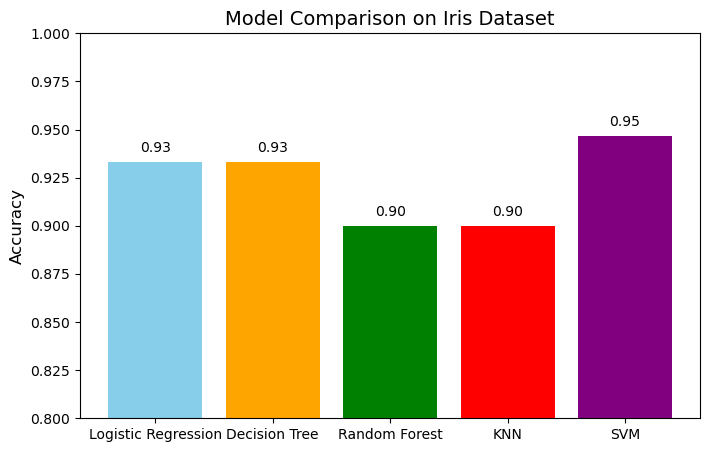

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bars = plt.bar(performance_df["Model"], performance_df["Accuracy"], color=["skyblue","orange","green","red","purple"])
plt.ylim(0.8,1.0)
plt.title("Model Comparison on Iris Dataset", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)

# Add accuracy labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', fontsize=10)

plt.show()

#### Observation:

1. Logistic Regression and Decision Tree achieved the highest accuracy (93.3%).

2. Random Forest performed slightly lower at 90%.

3. All models were strong, but since the dataset is small and balanced, even simple models (like Logistic Regression) worked very well.

4. SVM achieved a high accuracy of around 94.7%, making it one of the top-performing models as  well.

5. Overall, Logistic Regression, Decision Tree, and SVM are slightly better choices for this    dataset, while KNN and Random Forest still provide good performance.

## 7. Conclusion 

1. In this project, we developed and evaluated machine learning models to classify Iris flowers into three species (Setosa, Versicolor, Virginica) based on sepal and petal measurements.

2. We explored Logistic Regression, Decision Tree, and Random Forest models.

3. All models performed well, with accuracies ranging from 90% to 93.3%.

4. Iris-setosa was consistently classified with perfect accuracy across all models.

5. The main challenge was in distinguishing between Iris-versicolor and Iris-virginica, which occasionally got misclassified as each other.

6. Among the models, Logistic Regression and Decision Tree gave the best performance (93.3%), while Random Forest was slightly lower at 90%.

#### Key Learning:
This task provided hands-on experience with classification problems, covering data exploration, visualization, model building, evaluation, and comparison. It also highlighted the importance of evaluating models beyond just accuracy by considering class-wise performance.

## 8. Future Work

1. Hyperparameter tuning: Optimize Decision Tree and Random Forest using GridSearchCV or RandomizedSearchCV to improve performance.

2. Cross-validation: Use k-fold cross-validation to get a more reliable estimate of model accuracy.

3. Additional models: Try other algorithms like Support Vector Machine (SVM) or K-Nearest Neighbors (KNN) for comparison.

4. Feature scaling & engineering: Experiment with normalization or derived features to see if model accuracy improves.

5. Larger datasets: Apply similar techniques on larger, more complex datasets to test model scalability.